# Tugas 1 Eksplorasi Data

## Membuat database iris di MySQL dan posgresql dan ditarik pakai power BI


1. Membuka power BI kemudian pilih get data

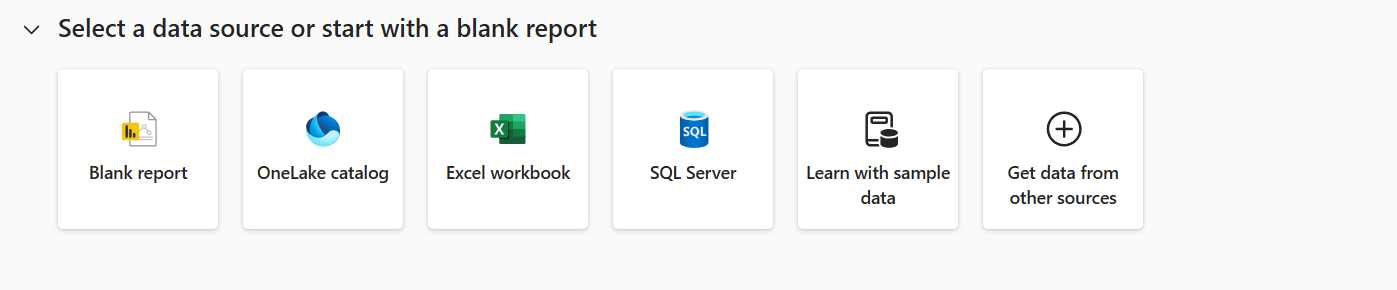

2. setelah itu klik database, lalu search "MySQL database" dan connect.

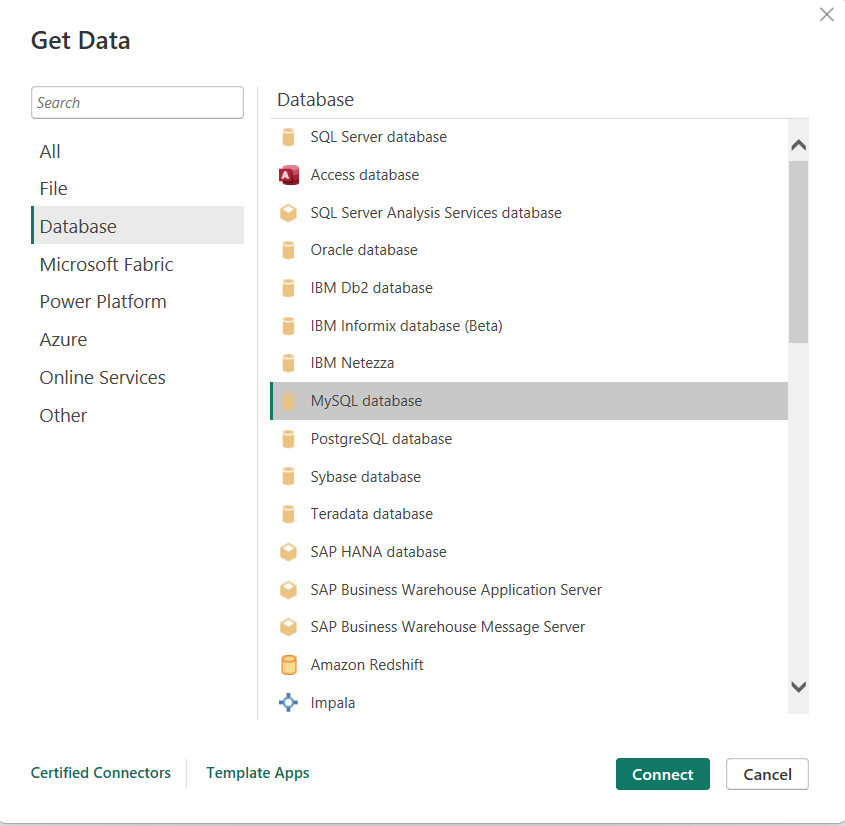

3. Disini saya menggunakan server "localhost" dan database denga "iris" lalu OK.

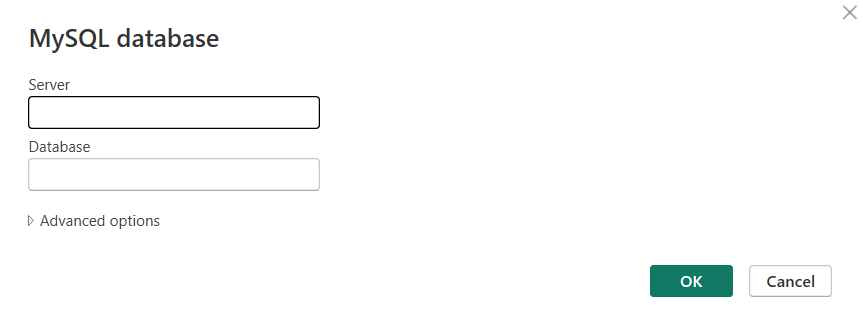

4. checklist kemudian load data

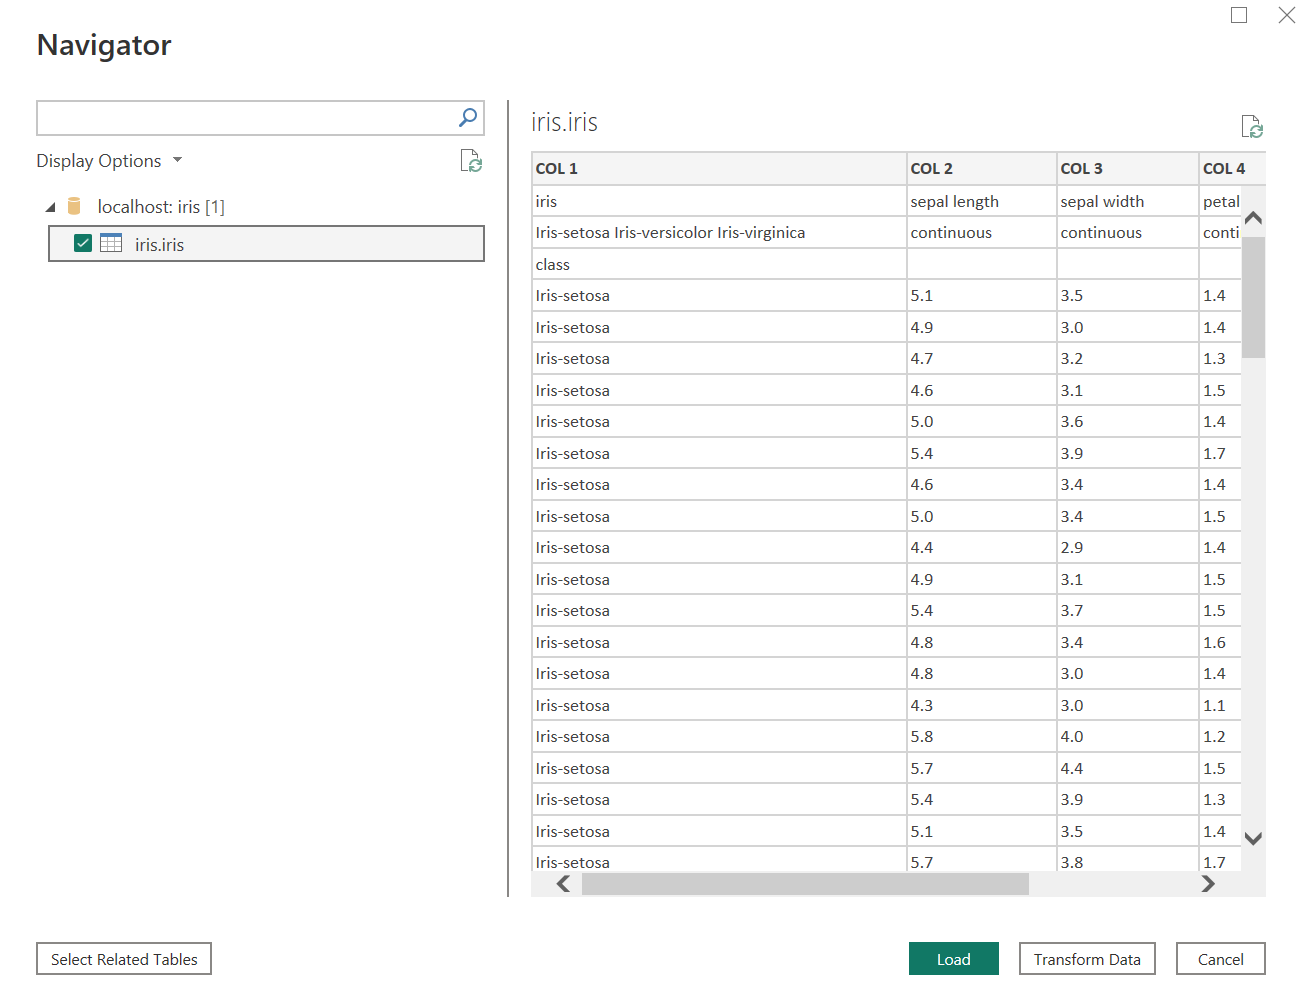

## Database POSGRESQL

Langkah pertama adalah membuka Power BI dan memastikan bahwa koneksi ke PostgreSQL sudah aktif atau berhasil terhubung. Setelah itu, pilih menu Get Data lalu cari opsi Postgres Database. Selanjutnya, klik tombol Connect untuk melanjutkan ke tahap berikutnya.

  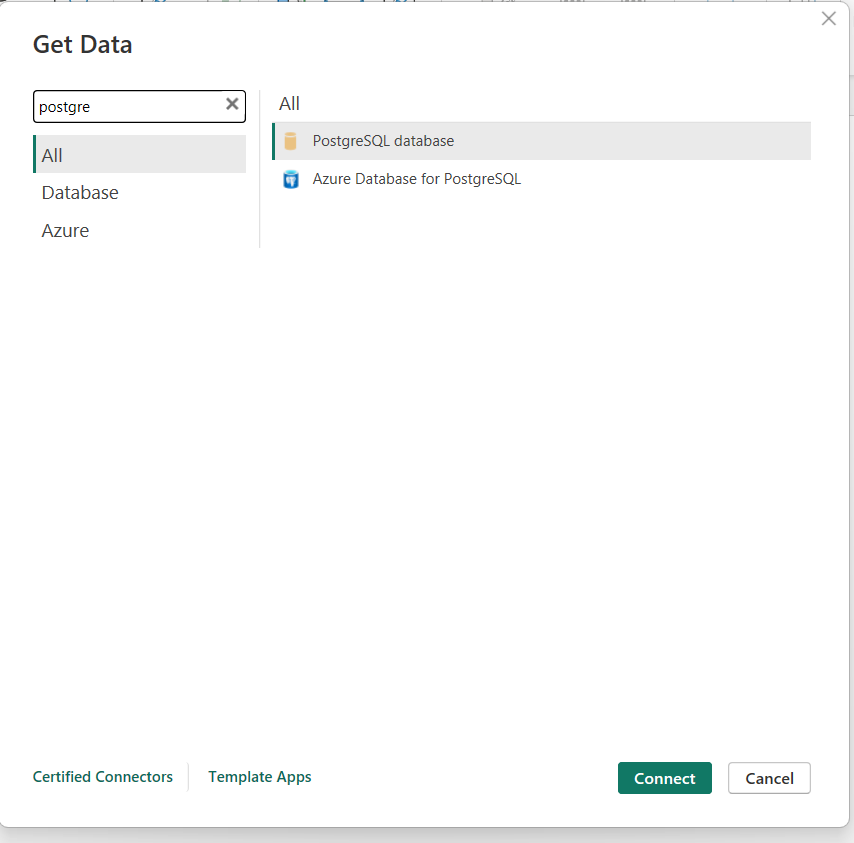

Selanjutnya, pada kolom **Server** isi dengan **localhost**, sedangkan pada bagian **Database** sesuaikan dengan nama database yang telah dibuat di PostgreSQL (pada contoh ini diberi nama **iris**).


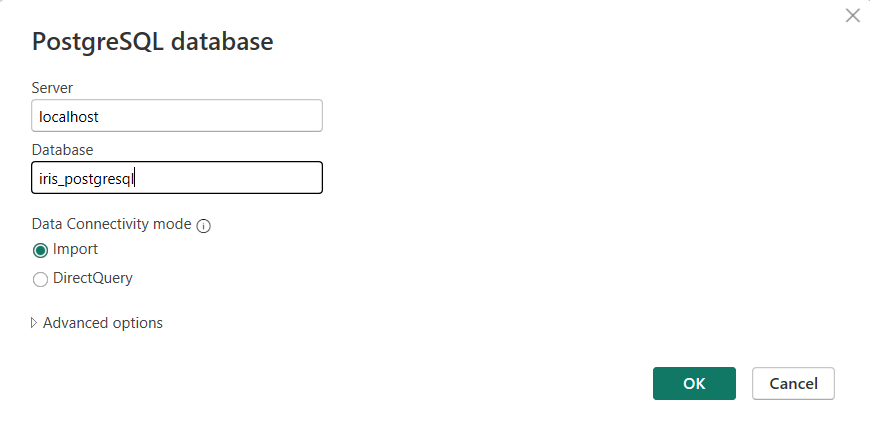

terakhir centang field checklist dan kemudian load data

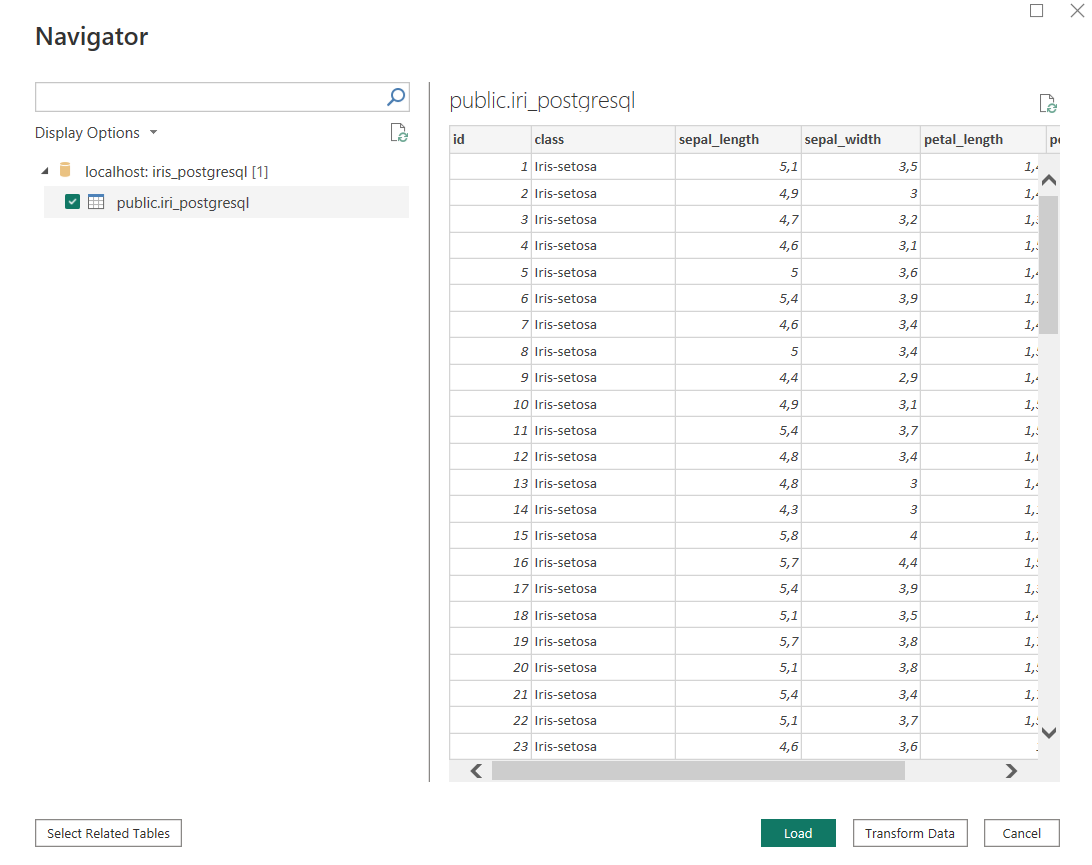

## Deskripsi data sesuai dengan tipe data

Tampilan pada gambar tersebut menunjukkan *Data view* di Power BI yang berisi dataset **iris\_dataset** dengan atribut utama seperti `class`, `petal_length`, `petal_width`, `sepal_length`, dan `sepal_width`. Pada sisi kanan terlihat beberapa measure yang telah dibuat menggunakan rumus DAX, di antaranya adalah **Avg Petal Length, Avg Petal Width, Avg Sepal Length, dan Avg Sepal Width** yang berfungsi untuk menghitung nilai rata-rata dari setiap atribut bunga, serta **Max** dan **Min** pada atribut yang sama untuk mengetahui nilai terbesar dan terkecilnya. Dalam kondisi ini, measure yang sedang ditampilkan adalah *Avg Sepal Width*, yang berarti Power BI akan menghitung rata-rata nilai lebar sepal dari seluruh data yang ada di dataset. Penggunaan fungsi **AVERAGE, MAX, dan MIN** ini sangat penting karena memungkinkan analisis statistik sederhana terhadap data Iris, seperti mengetahui rentang ukuran serta nilai rata-rata dari sepal maupun petal sehingga lebih mudah dalam melakukan perbandingan dan pengelompokan data.


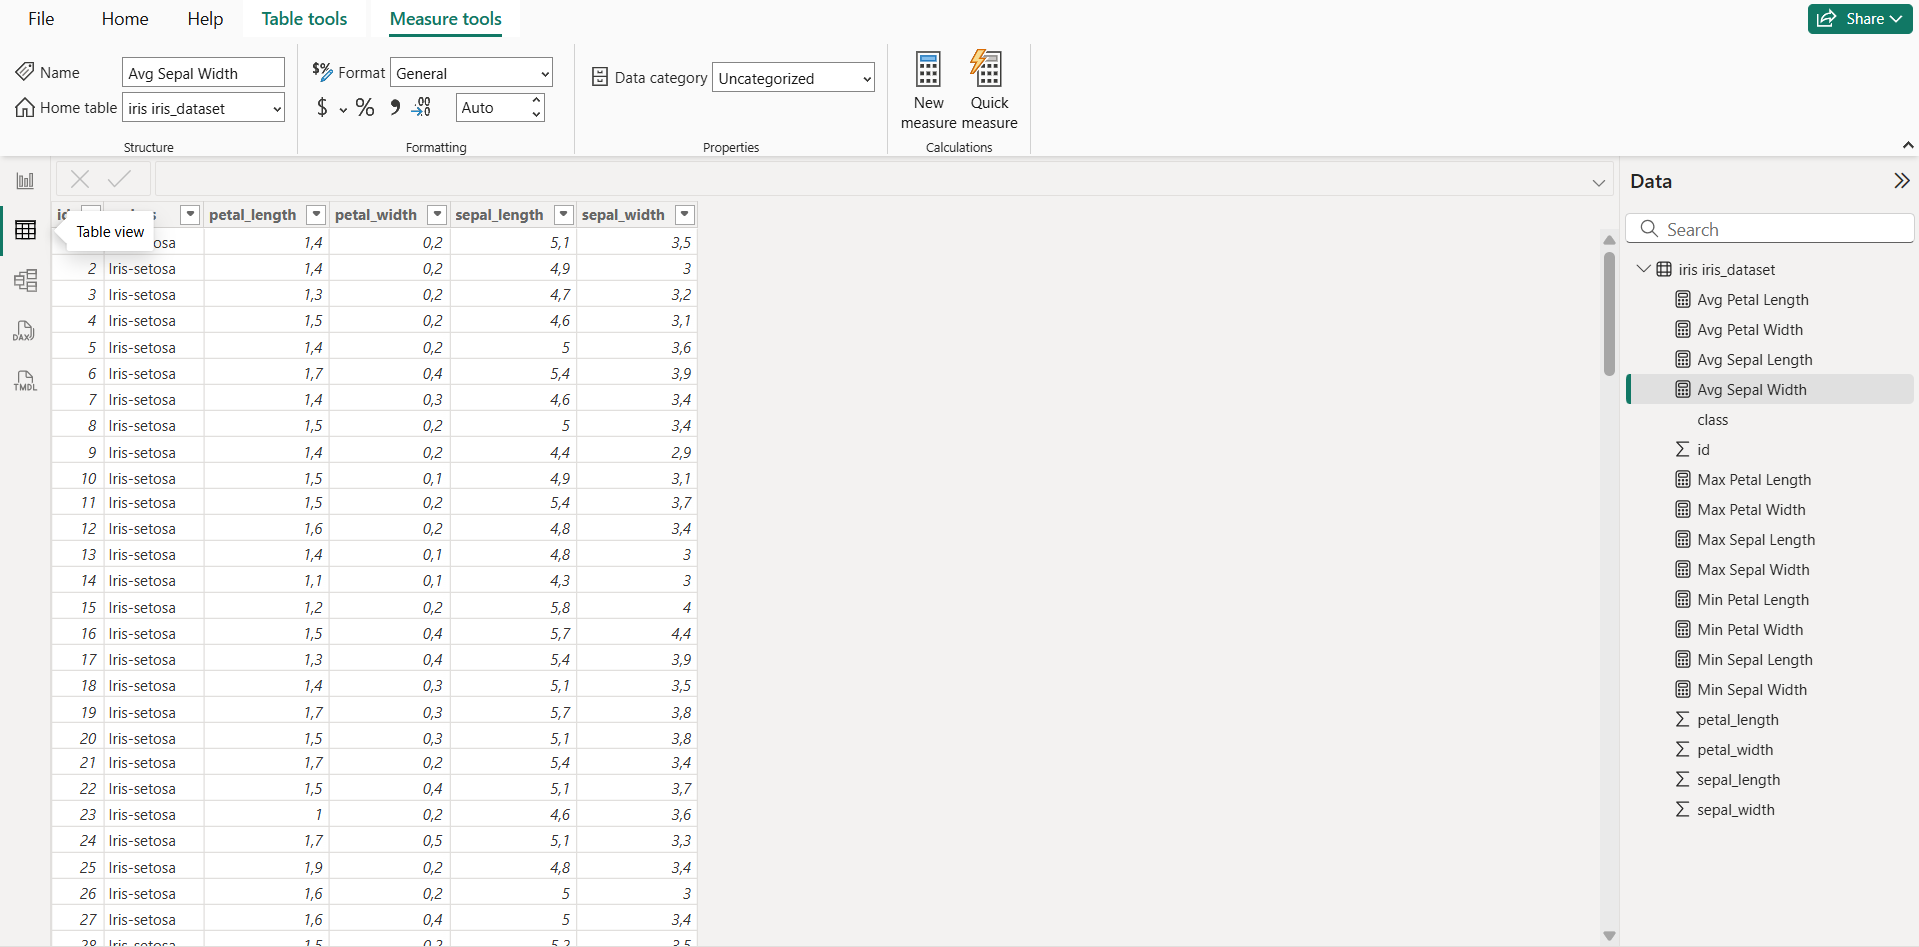

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Tipe Dataframe:")
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nFitur Numerik:", numeric_cols)
print("Fitur Kategorikal:", categorical_cols if categorical_cols else "Tidak ada (selain target yg numerik kode class)")

print("\nDeskripsi Statistik Data Numerik:")
print(df[numeric_cols].describe())

df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})
print("\nContoh Target (kategori):")
print(df[['target', 'target_name']].head())


Tipe Dataframe:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Fitur Numerik: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Fitur Kategorikal: Tidak ada (selain target yg numerik kode class)

Deskripsi Statistik Data Numerik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     

Cek missing value:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Data setelah Min-Max Normalization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Data setelah Standardization:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2

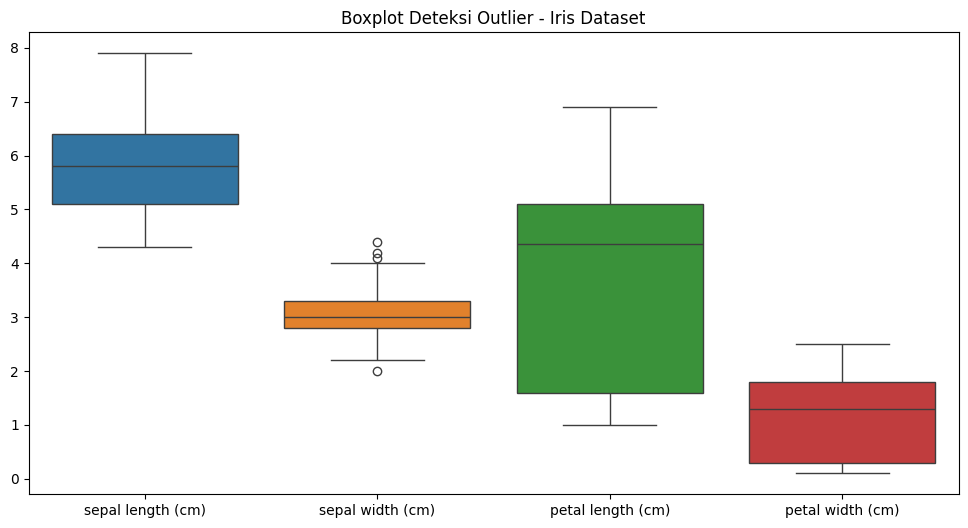

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print("Cek missing value:")
print(df.isnull().sum())

# Normalisasi
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[iris.feature_names]), columns=iris.feature_names)
df_normalized['target'] = df['target']
print("\nData setelah Min-Max Normalization:")
print(df_normalized.head())

scaler_std = StandardScaler()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df[iris.feature_names]), columns=iris.feature_names)
df_standardized['target'] = df['target']
print("\nData setelah Standardization:")
print(df_standardized.head())

# Deteksi Outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[iris.feature_names])
plt.title("Boxplot Deteksi Outlier - Iris Dataset")
plt.show()

## Eksplorasi Data

### Min max pada setiap kolom

In [ ]:
Min Petal Length = MIN('iris iris_dataset'[petal_length])
Min Petal Width = MIN('iris iris_dataset'[petal_width])
Min Sepal Length = MIN('iris iris_dataset'[sepal_length])
Min Sepal Width = MIN('iris iris_dataset'[sepal_width])

Kode diatas merupakan **rumus DAX (Data Analysis Expressions)** dalam Power BI yang digunakan untuk membuat *measure* atau ukuran data. Pada rumus tersebut, fungsi `MIN()` berperan untuk mengambil nilai paling kecil dari suatu kolom dalam tabel `'iris iris_dataset'`, yaitu dataset Iris yang berisi informasi bunga dengan atribut panjang dan lebar kelopak (*petal*) serta sepal. Measure `Min Petal Length` berfungsi menghitung nilai minimum dari kolom `petal_length`, `Min Petal Width` mengambil nilai terendah dari `petal_width`, `Min Sepal Length` menentukan nilai minimum dari `sepal_length`, sedangkan `Min Sepal Width` menghasilkan nilai minimum dari `sepal_width`. Dengan demikian, rangkaian kode ini dipakai untuk menemukan ukuran terkecil dari tiap atribut bunga dalam dataset Iris sehingga dapat mendukung proses analisis, misalnya dalam mengidentifikasi dimensi petal maupun sepal yang paling kecil pada data yang tersedia.


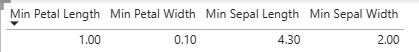

In [ ]:
Max Petal Length = MAX('iris iris_dataset'[petal_length])
Max Petal Width = MAX('iris iris_dataset'[petal_width])
Max Sepal Length = MAX('iris iris_dataset'[sepal_length])
Max Sepal Width = MAX('iris iris_dataset'[sepal_width])

Kode diatas merupakan **rumus DAX (Data Analysis Expressions)** di Power BI yang dipakai untuk membuat *measure* dalam menghitung nilai tertinggi dari suatu kolom pada tabel. Fungsi `MAX()` digunakan untuk memperoleh nilai maksimum dari kolom dalam tabel `'iris iris_dataset'`, yaitu dataset Iris yang memuat informasi panjang dan lebar kelopak (*petal*) maupun sepal. Measure `Max Petal Length` berfungsi menemukan nilai terbesar pada kolom `petal_length`, `Max Petal Width` digunakan untuk mengambil nilai maksimum dari `petal_width`, `Max Sepal Length` menentukan nilai tertinggi dari `sepal_length`, sedangkan `Max Sepal Width` menghasilkan nilai terbesar dari `sepal_width`. Dengan demikian, kode ini dipakai untuk mengetahui ukuran terbesar dari setiap atribut bunga dalam dataset Iris sehingga dapat dimanfaatkan dalam proses analisis, contohnya untuk melihat batas ukuran maksimal kelopak dan sepal dari bunga yang tercatat pada data.



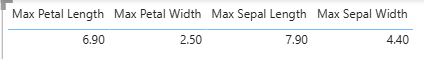

### Avarage pada setiap kolom

In [ ]:
Avg Petal Length = AVERAGE('iris iris_dataset'[petal_length])
Avg Petal Width = AVERAGE('iris iris_dataset'[petal_width])
Avg Sepal Length = AVERAGE('iris iris_dataset'[sepal_length])
Avg Sepal Width = AVERAGE('iris iris_dataset'[sepal_width])

Kode diatas merupakan **rumus DAX (Data Analysis Expressions)** di Power BI yang berfungsi untuk membuat *measure* dalam menghitung **nilai rata-rata** dari setiap kolom pada tabel. Fungsi `AVERAGE()` dipakai untuk memperoleh nilai rerata dari kolom yang ada di tabel `'iris iris_dataset'`, yakni dataset Iris yang memuat informasi panjang dan lebar kelopak (*petal*) serta sepal. Measure `Avg Petal Length` digunakan untuk menghitung rata-rata nilai dari kolom `petal_length`, `Avg Petal Width` untuk mendapatkan rata-rata dari `petal_width`, `Avg Sepal Length` untuk menentukan nilai rata-rata dari `sepal_length`, dan `Avg Sepal Width` untuk menghitung rata-rata dari `sepal_width`. Dengan demikian, kode ini membantu menemukan ukuran rata-rata dari masing-masing atribut bunga pada dataset Iris sehingga bisa digunakan dalam analisis, misalnya untuk mengetahui kecenderungan umum ukuran kelopak dan sepal pada seluruh data sampel bunga.


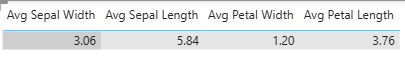

### jumlah setiap kelas ditampilkan dalam grafik batang

#### Grafik batang Min

Gambar tersebut merupakan diagram batang yang menampilkan nilai minimum dari setiap atribut pada dataset Iris, yaitu panjang dan lebar kelopak (*petal*) serta panjang dan lebar sepal. Warna biru muda menunjukkan nilai minimum *petal length*, biru tua menunjukkan nilai minimum *petal width*, oranye menunjukkan nilai minimum *sepal length*, sedangkan ungu menunjukkan nilai minimum *sepal width*. Dari grafik terlihat bahwa nilai minimum *sepal length* memiliki angka tertinggi dibanding atribut lain, sedangkan *petal width* memiliki nilai terkecil dari semuanya. Sementara itu, nilai minimum *petal length* lebih besar daripada *petal width* namun lebih kecil dibanding *sepal width*. Hal ini menunjukkan bahwa pada dataset Iris, ukuran minimum sepal secara umum lebih besar daripada ukuran minimum petal, sesuai dengan karakteristik biologis bunga iris.


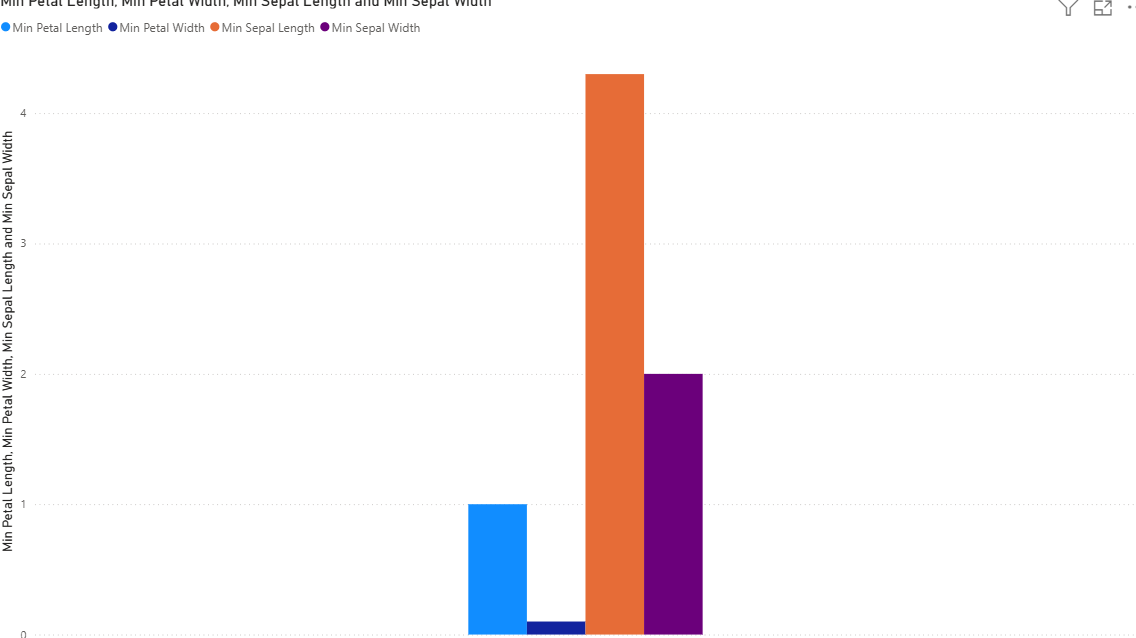

#### Grafik batang Max
Gambar tersebut menampilkan diagram batang yang menunjukkan nilai maksimum dari atribut pada dataset Iris, yaitu panjang dan lebar kelopak (*petal*) serta panjang dan lebar sepal. Batang biru muda merepresentasikan *Max Petal Length*, biru tua menunjukkan *Max Petal Width*, oranye menandakan *Max Sepal Length*, dan ungu menggambarkan *Max Sepal Width*. Berdasarkan grafik, nilai maksimum tertinggi terdapat pada *sepal length* yang mendekati angka 8, diikuti oleh *petal length* dengan nilai sekitar 7. Sementara itu, *sepal width* memiliki nilai maksimum sekitar 4,5, dan *petal width* menunjukkan nilai terendah dengan kisaran 2,5. Hal ini mengindikasikan bahwa pada dataset Iris, ukuran maksimum sepal, khususnya panjangnya, lebih besar dibandingkan atribut lain, sedangkan lebar petal memiliki nilai maksimum terkecil.


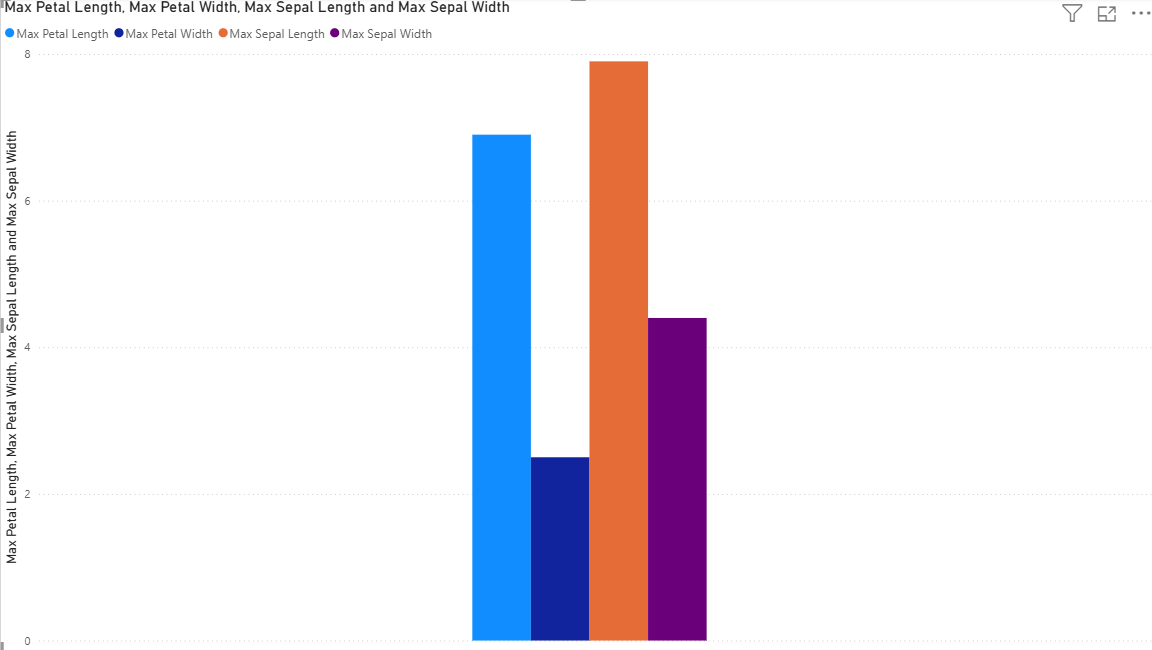

#### Grafik Batang AVG

Gambar tersebut menampilkan diagram batang yang menggambarkan nilai rata-rata dari atribut pada dataset Iris, yaitu panjang dan lebar kelopak (*petal*) serta panjang dan lebar sepal. Batang biru muda merepresentasikan *Avg Petal Length*, biru tua menunjukkan *Avg Petal Width*, oranye menggambarkan *Avg Sepal Length*, dan ungu menunjukkan *Avg Sepal Width*. Berdasarkan grafik, nilai rata-rata tertinggi terdapat pada *sepal length* dengan kisaran mendekati 6, disusul oleh *petal length* sekitar 3,7. Sementara itu, *sepal width* memiliki rata-rata sekitar 3, dan *petal width* menjadi atribut dengan rata-rata paling kecil, yakni sekitar 1,2. Hal ini mengindikasikan bahwa secara umum ukuran sepal lebih besar dibandingkan petal, sedangkan lebar petal merupakan atribut dengan nilai rata-rata terkecil dalam dataset Iris.


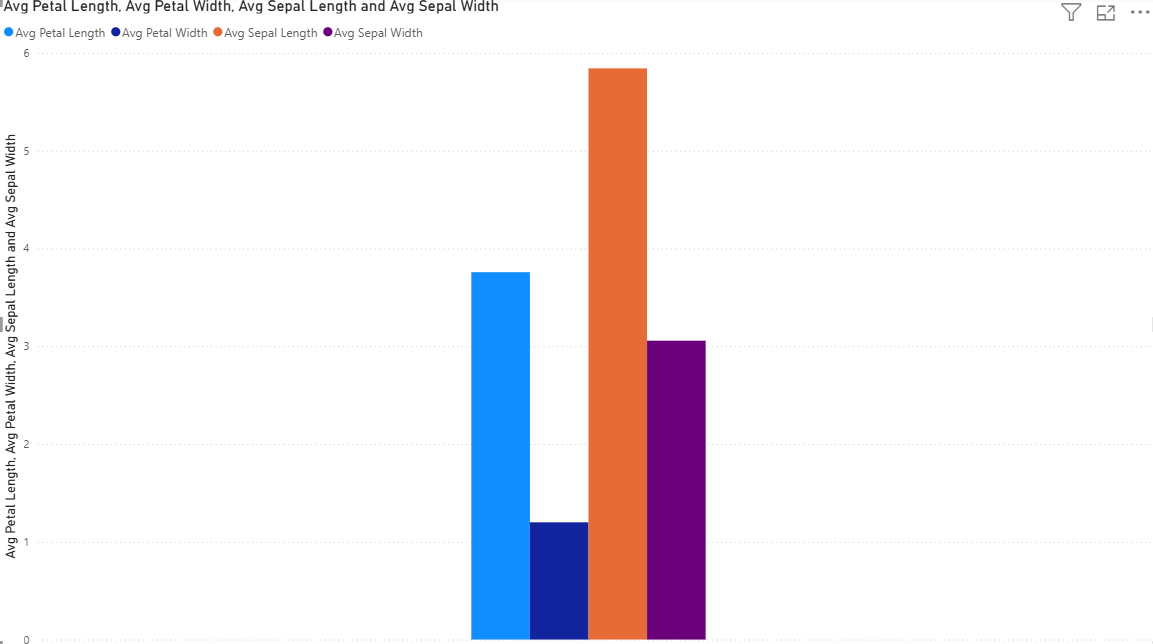

###

###